Weronika Bednarz

ANALIZA ZBIORU DANYCH

1. Otwórz plik insuranceSAD.csv .

Zostały zaimportowane wymagane biblioteki Pandas w celu przeprowadzenia analizy.

In [ ]:
import pandas as pd
import numpy as np


Dysk Google został podłączony i niezbędne pliki zostały wczytane z niego.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/insuranceSAD.csv')

2. Oblicz statystyki opisowe dla zmiennych ilościowych.

Zastosowano polecenie df.describe(), które generuje podstawowe statystyki opisowe dla kolumn numerycznych w ramce danych (DataFrame). Wartości te obejmują średnią, odchylenie standardowe, wartości minimalne i maksymalne, kwartyle i wiele innych. Wyniki są prezentowane w formie tabelarycznej.

In [ ]:
df.describe()

,Unnamed: 0,age,bmi,children,smoker,charges,female
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,0.204783,13270.422265,0.494768
std,386.391641,14.049960,6.098187,1.205493,0.403694,12110.011237,0.500160
min,0.000000,18.000000,15.960000,0.000000,0.000000,1121.873900,0.000000
25%,334.250000,27.000000,26.296250,0.000000,0.000000,4740.287150,0.000000
50%,668.500000,39.000000,30.400000,1.000000,0.000000,9382.033000,0.000000
75%,1002.750000,51.000000,34.693750,2.000000,0.000000,16639.912515,1.000000
max,1337.000000,64.000000,53.130000,5.000000,1.000000,63770.428010,1.000000


Zostały wyodrębnione trzy kolumny z ramki danych "df": age, bmi oraz charges. Metoda describe() została użyta w celu zwrócenia ośmiu podstawowych statystyk opisowych dla każdej z trzech wybranych kolumn w DataFrame.

In [ ]:
df[['age','bmi','charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


Średnia wieku wynosi 39,21 lat, z odchyleniem standardowym równym 14,05, a mediana wynosi 39 lat. To sugeruje, że rozkład może być normalny. Moda i mediana nie są jednak do siebie zbliżone, co oznacza, że rozkład może nie być symetryczny. Najwięcej osób miało 18 lat (69 osób). Dolny kwartyl informuje nas, że 25% osób miało wiek poniżej 27 lat, a górny kwartyl informuje, że 75% osób miało wiek poniżej 51 lat. Rozstęp (max-min) wynosi 46.

Do analizy została zaimportowana biblioteka Matplotlib.

In [ ]:
import matplotlib.pyplot as plt

Dla zmiennej charges wykonano wykres ramka-wąsy.

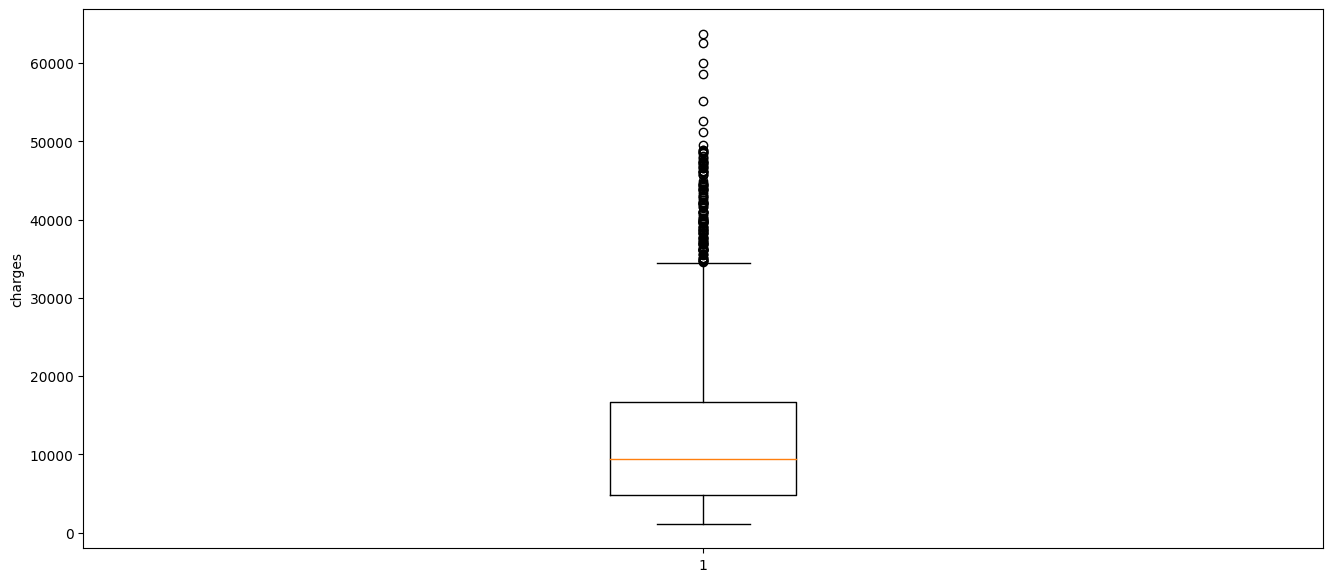

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.boxplot(df['charges'].dropna())

ax.set_ylabel('charges')

plt.show()

3. Dla zmiennej charges wykonaj histogram i wykres ramka-wąsy.

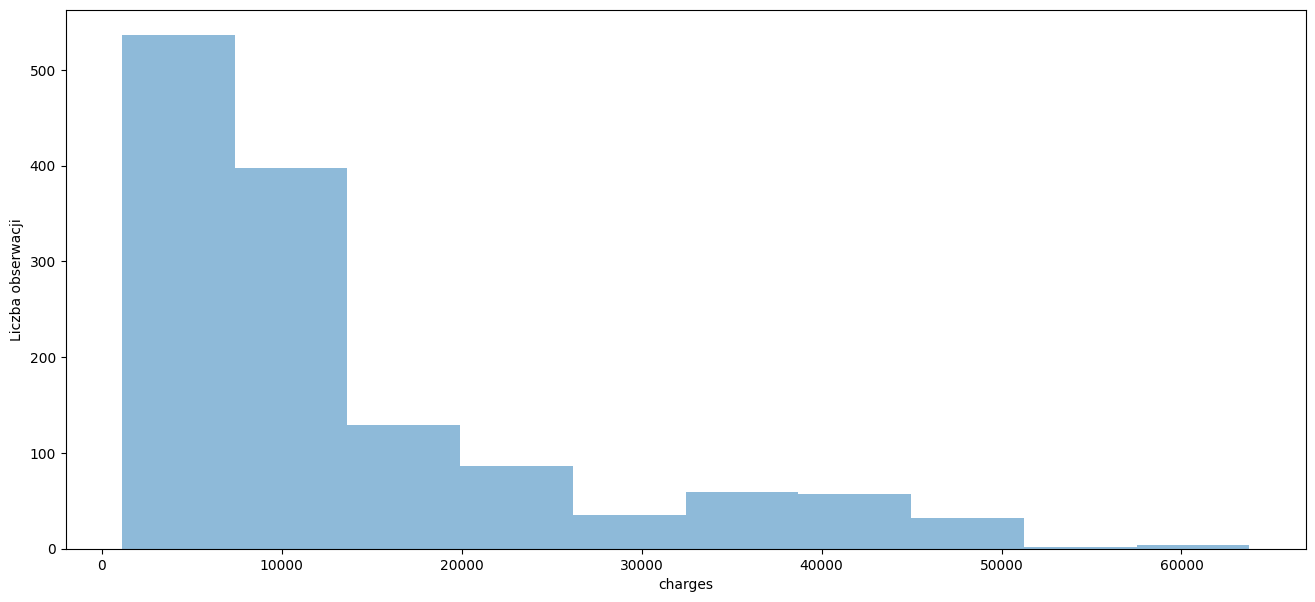

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.hist(df['charges'], bins=10, alpha=0.5)

# histogram
# -> bins: liczba słupków
# -> alpha: transparentność

ax.set_xlabel('charges')
ax.set_ylabel('Liczba obserwacji')

plt.show()


4. Dla zmiennej charges wykonaj skategoryzowane histogramy i wykresy ramka-wąsy. Kategoryzacji dokonaj ze względu na płeć i /lub palenie. Zinterpretuj opracowane wykresy.


Zostały stworzone histogramy z podziałem na płeć i charges, aby dokładniej przeanalizować rozkład tej zmiennej w zależności od płci.

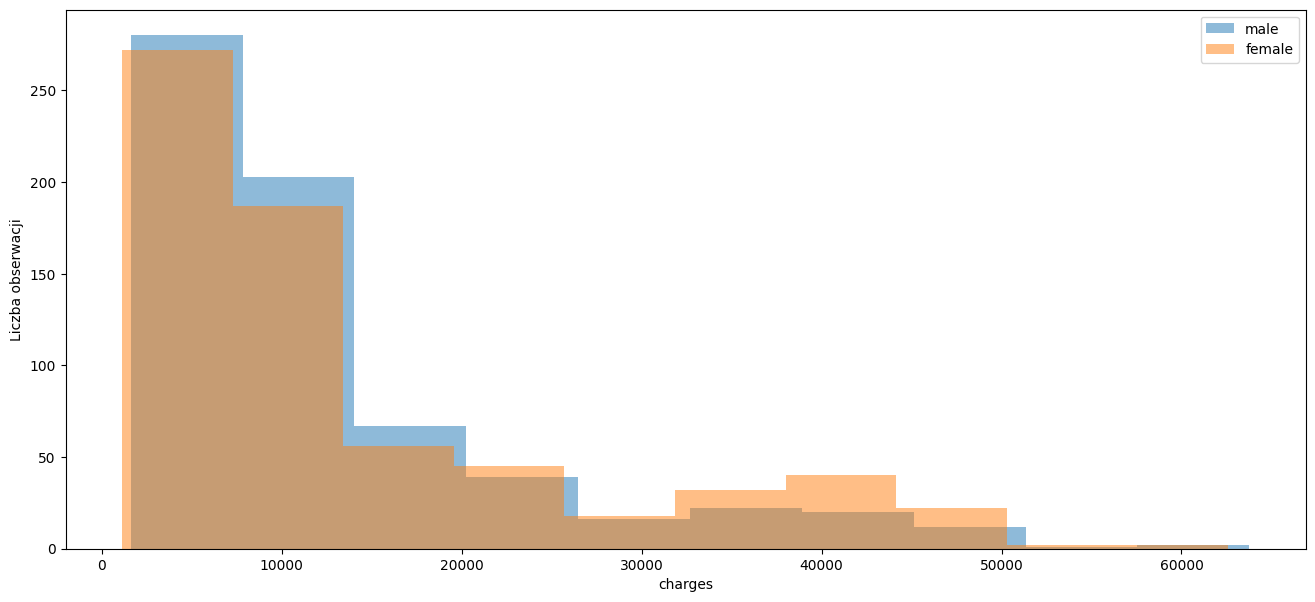

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))


ax.hist(df.loc[df['female']==1, 'charges'], bins=10, alpha=0.5, label = 'male')
ax.hist(df.loc[df['female']==0, 'charges'], bins=10, alpha=0.5, label ='female')

ax.set_xlabel('charges')
ax.set_ylabel('Liczba obserwacji')
ax.legend()

plt.show()

Został stworzony skategoryzowany wykres ramka wąsy dla zmiennej charges, aby zbadać rozkład tej zmiennej dla różnych kategorii.

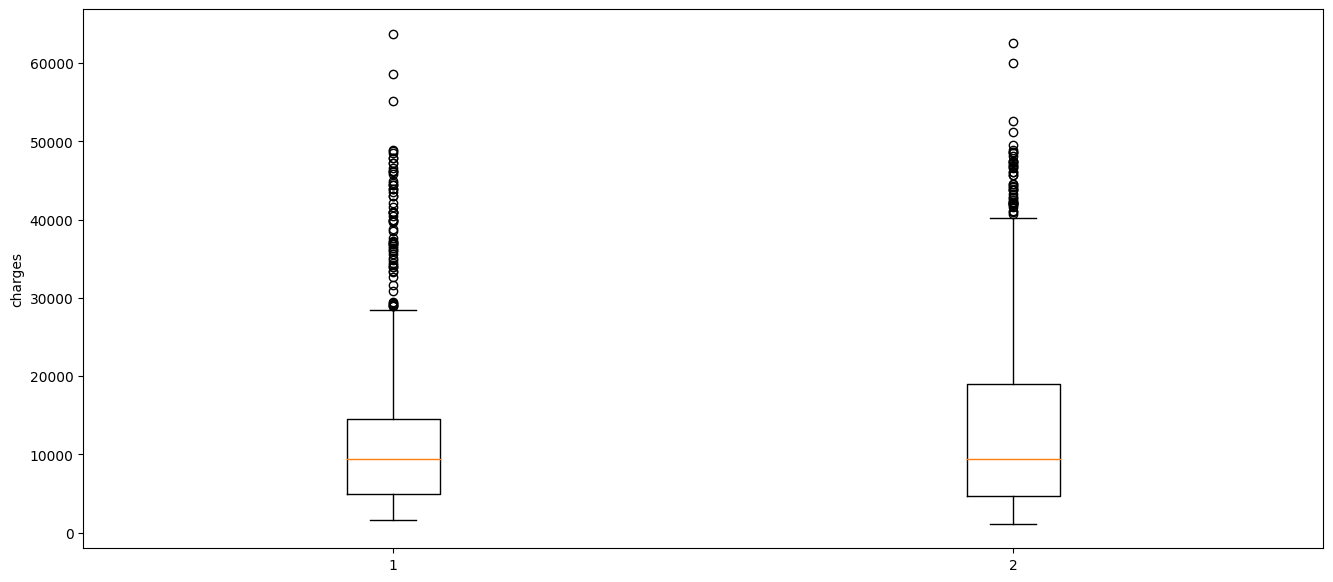

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.boxplot([df.loc[df['female']==1, 'charges'].dropna(),
           df.loc[df['female']==0, 'charges'].dropna()])

ax.set_ylabel('charges')

plt.show()

Została zaimportowana biblioteka Seaborn, oparta na bibliotece Matplotlib, do wizualizacji danych.

In [ ]:
import seaborn as sns

5. Wykonaj wykres słupkowy dla wybranej zmiennej jakościowej.

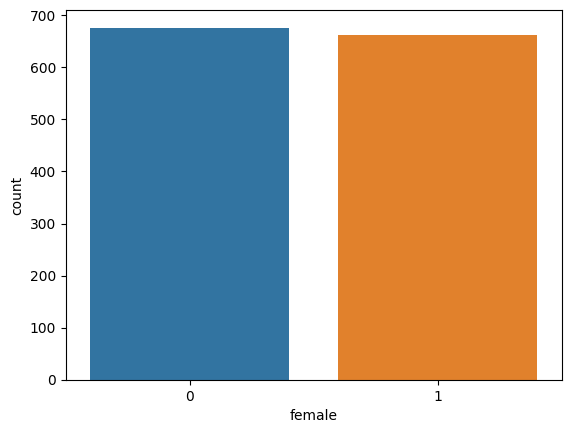

In [ ]:
sns.countplot(x='female',
              data = df)

plt.show()

Na podstawie powyższego wykresu można wywnioskować, że w testach wzięło udział więcej mężczyzn niż kobiet.

KORELACJA I REGRESJA

1. Sporządź macierz korelacji dla wszystkich zmiennych. Zinterpretuj wyniki. Które zmienne są skorelowane ze zmienną charges?

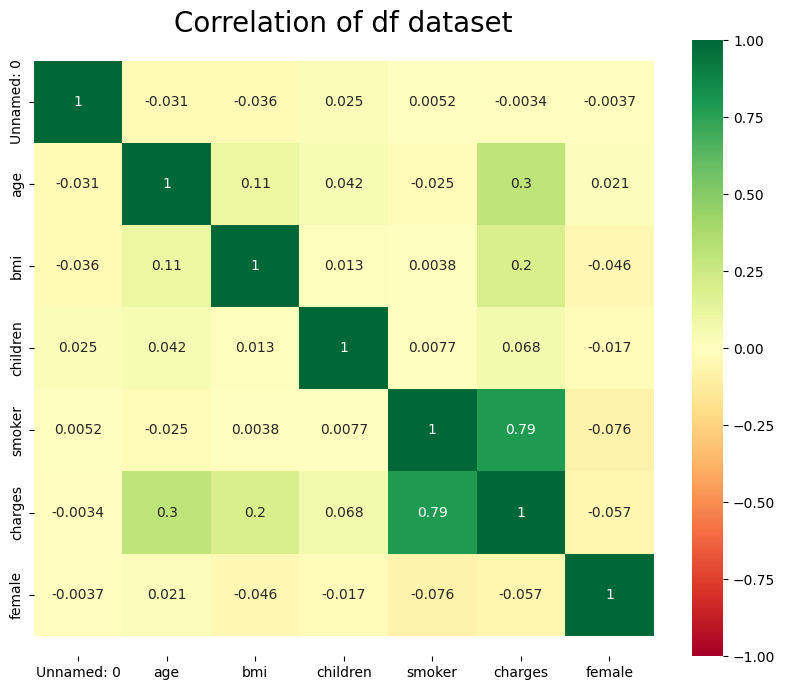

In [ ]:
plt.figure(figsize=(10, 8))

# wizualizacja Heatmapy korelacji
ax = sns.heatmap(df.corr(),
                 xticklabels=df.corr().columns,
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 vmin=-1, vmax=1,
                 annot=True, center=0)

# dekoracja wykresu
plt.title('Correlation of df dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25) # odsunięcie etykiet od wykresu

# Zmiana wymiaru etykiet
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Na przekątnej macierzy korelacji znajdują się wartości 1, ponieważ jest to korelacja zmiennych ze sobą samymi (macierz jest symetryczna). Wartości poza przekątną reprezentują korelację pomiędzy parami zmiennych. Zmienne, które są skorelowane z charges, to age (wiek) oraz smoker (palacz).

2. Podziel zbiór danych na zbiór treningowy i testowy.
3. Zbuduj model regresji wielorakiej dla zmiennej charges.
4. Dokonaj predykcji dla zbioru treningowego i testowego.

In [ ]:
# wybór zmiennych do modelu: X - zmienne objaśniające, y - zmienna objaśniana(zależna)
X = df[['bmi', 'children', 'smoker', 'female', 'age']]
y = df[['charges']]

In [ ]:
X.shape

(1338, 5)

In [ ]:
y.shape

(1338, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# podział X i y na zniór testowy i treningowy - 20% (test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# wyświetlanie kształtu zbiorów
for subset in [X, y, X_train, y_train, X_test, y_test]:
    print(subset.shape)

(1338, 5)
(1338, 1)
(1070, 5)
(1070, 1)
(268, 5)
(268, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

Stosunek zbioru testowego do calości (czyli sprawdzenie czy wychodzi 20%).

In [ ]:
268/1338

0.20029895366218237

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Zostały wypisane współczynniki modelu.

In [ ]:
model.coef_

array([[3.27533514e+02, 4.27254431e+02, 2.36539033e+04, 7.95178837e+00,
        2.57068962e+02]])

Został wypisany wyraz wolny.

In [ ]:
model.intercept_

array([-12121.40303928])

Została wykonana predykcja.

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

5. Oblicz wybrane metryki, zinterpretuj wyniki i oceń jakość modelu.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
R2_train = r2_score(y_true = y_train, y_pred = y_predict_train)
R2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_predict_train)
MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_predict_test)

MSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train)
MSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test)

RMSE_train = mean_squared_error(y_true = y_train, y_pred = y_predict_train, squared = False)
RMSE_test = mean_squared_error(y_true = y_test, y_pred = y_predict_test, squared = False)

print(f'''R2_train = {R2_train},     R2_test = {R2_test},
MAE_train = {MAE_train},    MAE_test = {MAE_test},
MSE_train = {MSE_train},    MSE_test = {MSE_test},
RMSE_train = {RMSE_train},    RMSE_test = {RMSE_test} ''')

R2_train = 0.7410888590280913,     R2_test = 0.7811302113434095,
MAE_train = 4210.693655802026,    MAE_test = 4213.484797807141,
MSE_train = 37369582.735319406,    MSE_test = 33979257.05080822,
RMSE_train = 6113.066557409579,    RMSE_test = 5829.17293025419 


Wykres rozrzutu wartości przewidywanych względem obserwowanych.

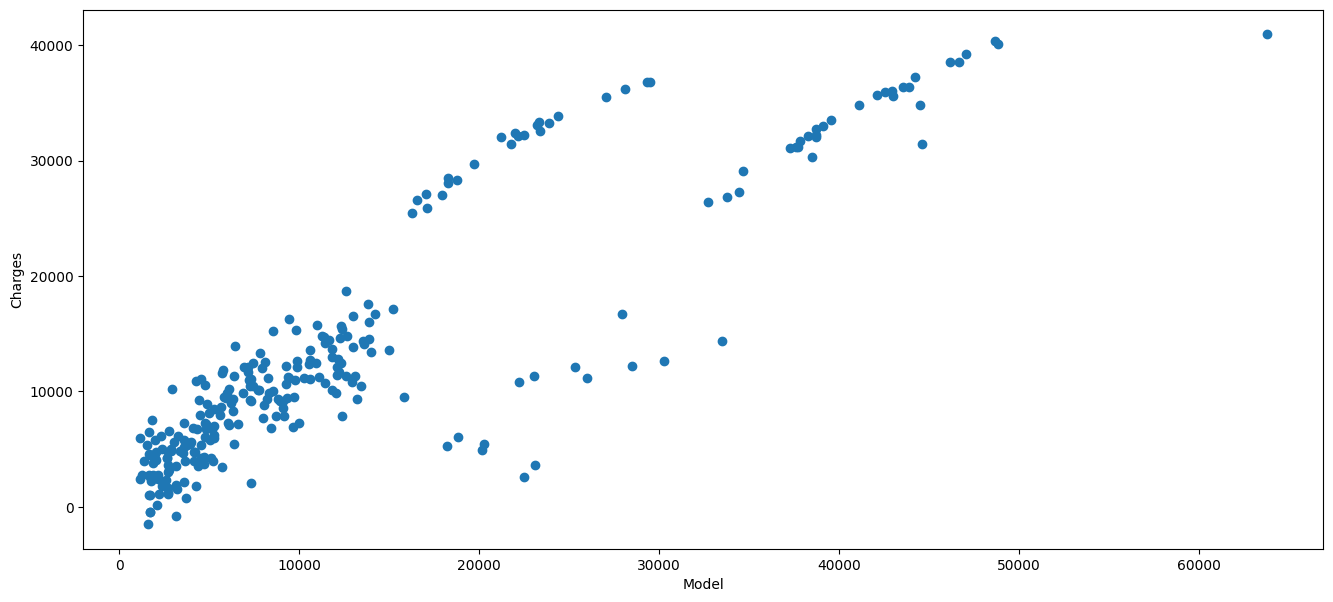

In [ ]:
fig, ax = plt.subplots(figsize=(16,7))

ax.scatter(x=y_test,
           y=y_predict_test)

ax.set_xlabel('Model')
ax.set_ylabel('Charges')

plt.show()

WNIOSKI

Badanie danych pozwoliło na pozyskanie informacji o zmiennych, które są mierzone w 
sposób ilościowy i jakościowy. Dodatkowo, uzyskano opisowe statystyki, co pozwoliło na 
lepsze zrozumienie charakterystyk i rozkładu danych w każdej zmiennej. Aby przedstawić 
wyniki w bardziej zrozumiały sposób, wykorzystano histogramy i wykresy typu ramka-wąsy. 
Analiza korelacji między zmiennymi wykazała, że największy wpływ na wartość zmiennej 
charges miały zmienne age i smoker. Wartości korelacji między innymi zmiennymi były 
niskie lub nieistotne. 